In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing the data
data = pd.read_csv('../data/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Manipulation:

##### Extract the 5th column and store it in 'customer_5'

##### Also extract the 15th column and store it in 'customer_15'

In [14]:
customer_5 = data.iloc[:,4]
customer_5.head()

# customer_15 = data.iloc[:,14]
# customer_15.name

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

##### Extract all the male senior citizens whose Payment method is Electronic Check and store the result in 'senior_male_electronic'

In [18]:
SME = data[(data.SeniorCitizen==1) & (data.gender=='Male') & (data.PaymentMethod=='Electronic check')]
SME.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


##### Extract all those customers whose tenure is greater than 70 months or their monthly charges exceed 100 dollars- store the result in 'customer_total_tenure'

In [20]:
CTT = data[(data.tenure>70) | (data.MonthlyCharges>100)]
CTT.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


##### Extract all those customers whose contract is of two years, payment method is mailed check and the value of churn is 'Yes' - store the result in 'two_mail_yes'

In [22]:
TMY = data[(data.Contract=='Two year') & (data.PaymentMethod=='Mailed check') & (data.Churn=='Yes')]
TMY.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


##### Extract 333 random records from the dataset and store the result in 'customer 333'

In [26]:
C333 = data.sample(333,axis=0,ignore_index=True,replace=False)
C333.shape

(333, 21)

##### Get the count of different levels from the 'Churn' column

In [34]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Data Visualization

##### Build a bar-plot for the 'Internet-service' column
* set x-axis label to 'categories of Internet Service'
* set y-axis label to 'Count of categories'
* set the title of plot to be 'Distribution of Internet Service'
* Set the color of the bars to be 'orange'

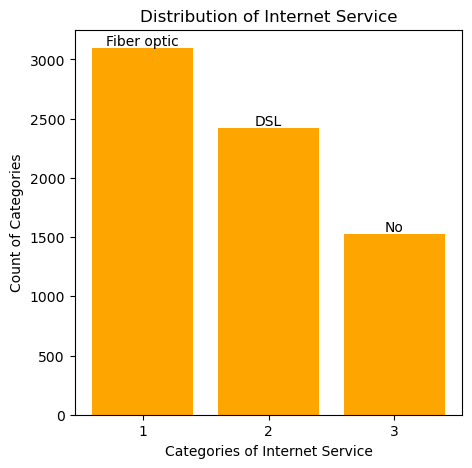

In [41]:
fig,ax = plt.subplots(figsize=(5,5))
rects = ax.bar(x=np.arange(1,4),height=data.InternetService.value_counts(),color='orange')
ax.bar_label(rects,labels=data.InternetService.value_counts().index)
ax.set_xticks(np.arange(1,4))
ax.set_title('Distribution of Internet Service')
ax.set_xlabel('Categories of Internet Service')
ax.set_ylabel('Count of Categories')
plt.show()

##### Build a histogram for the 'tenure' column
* set the number of bins to 30
* set the title of plot to be 'Distribution of tenure'
* Set the color of the bins to 'green'

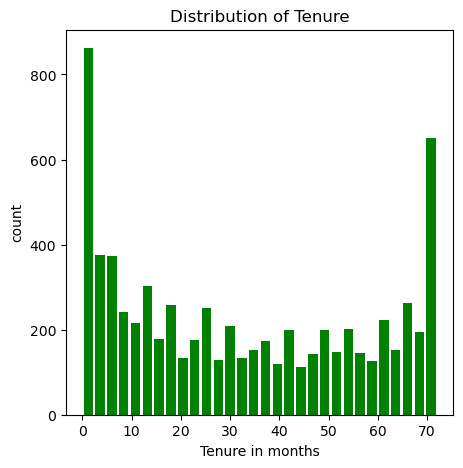

In [44]:
fig,ax = plt.subplots(figsize=(5,5))
ax.hist(data.tenure,bins=30,color='green',rwidth=.8)
ax.set_xticks(np.arange(0,75,10))
ax.set_title('Distribution of Tenure')
ax.set_xlabel('Tenure in months')
ax.set_ylabel('count')
plt.show()

##### Build a scatter-plot between 'MonthlyCharges' & 'tenure' . Map 'MonthlyCharges' to the y-axis & 'tenure' to the x-axis:
* set x-axis label to 'Tenure of customer'
* set y-axis label to 'Monthly Charges of customers'
* set the title of plot to be 'Tenure vs Monthly charges of customer'
* Set the color of the points to be 'brown'

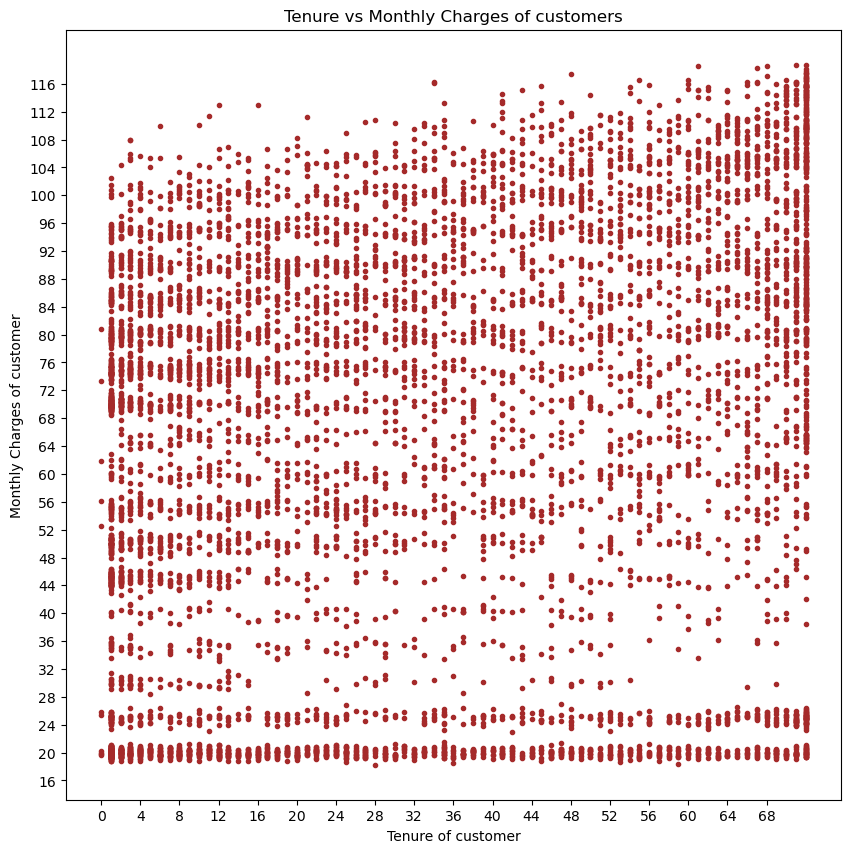

In [28]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(x=data.tenure,y=data.MonthlyCharges,c='brown',marker='.')
ax.set_xticks(np.arange(0,72,4))
ax.set_yticks(np.arange(16,120,4))
ax.set_title('Tenure vs Monthly Charges of customers')
ax.set_xlabel('Tenure of customer')
ax.set_ylabel('Monthly Charges of customer')
plt.show()

##### Build a box-plot between 'tenure' and 'Contract'. Map 'tenure' on the y-axis and 'Contract' on the x-axis.

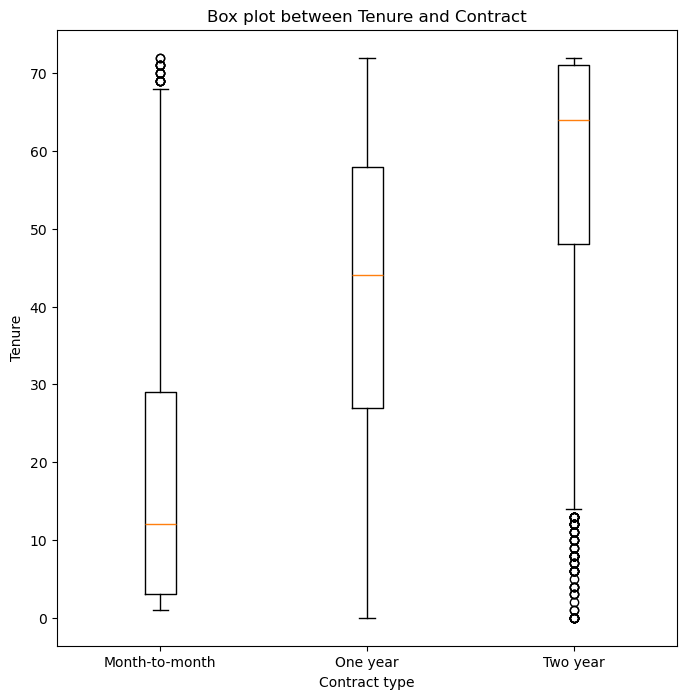

In [29]:
fig,ax = plt.subplots(figsize=(8,8))
for i,item in enumerate(data.Contract.unique()):
    ax.boxplot(x=data[data.Contract==item].tenure,positions=[i+1])
    
ax.set_xticks(np.arange(1,4))
ax.set_xticklabels(data.Contract.unique())
ax.set_title('Box plot between Tenure and Contract')
ax.set_xlabel('Contract type')
ax.set_ylabel('Tenure')
plt.show()

## Machine Learning

#### Linear Regression
* Build a simple linear model where dependent variable is 'Monthly Charges' and independent variable is 'tenure'
    - Divide the dataset into train and test sets in a 70:30 ratio
    - Train the model on the train set and predict the values on the test set
    - After predicting the value, find the root mean square error
    - find out the error in prediction and store the result in 'error'
    - Find the RMSE

In [46]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(data[['tenure']],data.MonthlyCharges,test_size=.3,random_state=69)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep=',')

(4930, 1),(4930,),(2113, 1),(2113,)


In [47]:
# creating and training the linear regressor
MLinReg = LinearRegression()

MLinReg.fit(X_train,y_train)

LinearRegression()

In [48]:
# predicting the values
y_pred = MLinReg.predict(X_test)

#RMSE
print(f'The root mean squared error for the model is: {root_mean_squared_error(y_test,y_pred)}')
# not a great model, rmse is 23

The root mean squared error for the model is: 28.95211365414189


#### Logistic Regression
* Build a simple linear model where independent variable is 'Monthly Charges' and dependent variable is 'Churn'
    - Divide the dataset into train and test sets in a 65:35 ratio
    - Train the model on the train set and predict the values on the test set
    - After predicting the value, find the confusion matrix and the accuracy score

In [50]:
# splitting the data
y = data.Churn.replace({'Yes':1,'No':0})

X_train, X_test, y_train, y_test = train_test_split(data[['MonthlyCharges']],y,test_size=.35,random_state=69)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep=',')

(4577, 1),(4577,),(2466, 1),(2466,)


In [51]:
# creating and training the linear regressor
MLogReg = LogisticRegression()

MLogReg.fit(X_train,y_train)

LogisticRegression()

In [53]:
# predicting the values
y_pred = MLogReg.predict(X_test)

#accuracy score
print(f'The accuracy score of the model is: {accuracy_score(y_test,y_pred)}')

The accuracy score of the model is: 0.740470397404704


<Axes: >

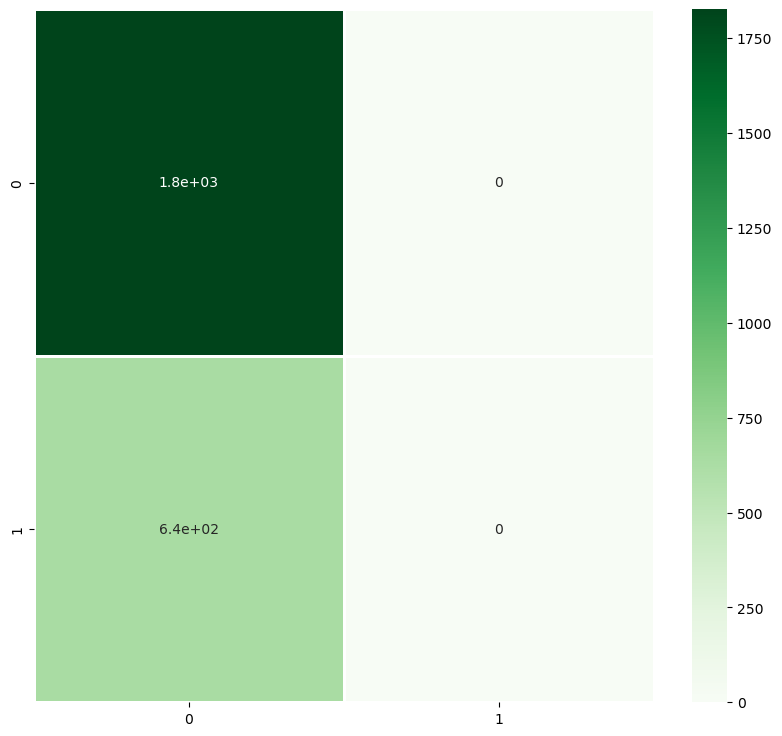

In [54]:
# the confusion matrix
plt.subplots(figsize=(10,9))
sns.heatmap(confusion_matrix(y_test,y_pred),linewidth=2,annot=True,cmap='Greens')
#terrible model with 0 recall on the churn class

#### Multiple Logistic Regression
* Build a multiple linear model where independent variables are 'Monthly Charges' and 'tenure' and dependent variable is 'Churn'
    - Divide the dataset into train and test sets in a 80:20 ratio
    - Train the model on the train set and predict the values on the test set
    - After predicting the value, find the accuracy score and confusion matrix

In [59]:
# splitting the data
y = data.Churn.replace({'Yes':1,'No':0})

X_train, X_test, y_train, y_test = train_test_split(data[['MonthlyCharges','tenure']],y,test_size=.35,random_state=69)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep=',')

(4577, 2),(4577,),(2466, 2),(2466,)


In [61]:
# creating and training the linear regressor
MLogReg2 = LogisticRegression()

MLogReg2.fit(X_train,y_train)

LogisticRegression()

In [63]:
# predicting the values
y_pred = MLogReg2.predict(X_test)

#accuracy score
print(f'The accuracy score of the model is: {accuracy_score(y_test,y_pred)}')

The accuracy score of the model is: 0.7850770478507705


<Axes: >

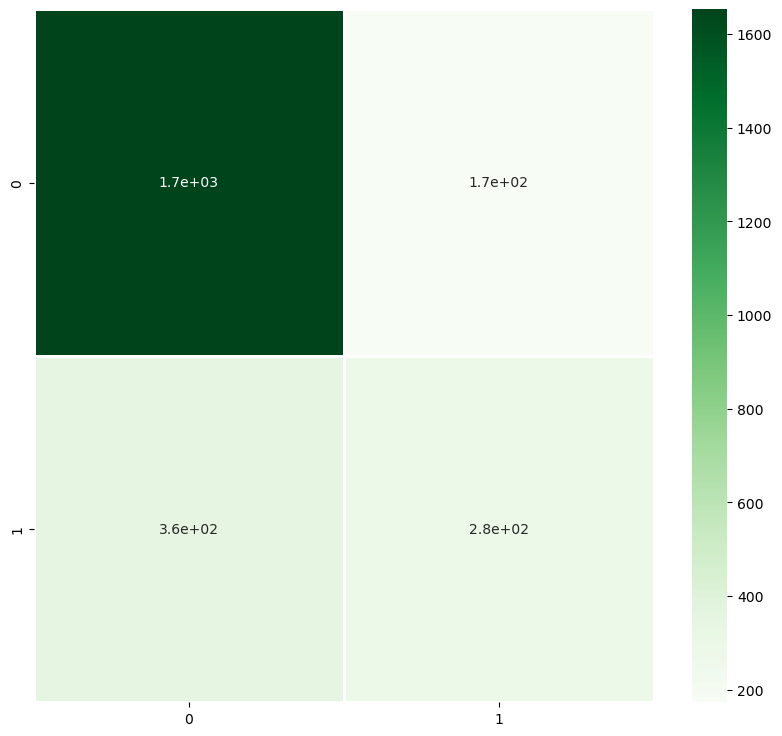

In [64]:
# the confusion matrix
plt.subplots(figsize=(10,9))
sns.heatmap(confusion_matrix(y_test,y_pred),linewidth=2,annot=True,cmap='Greens')
#terrible model with 0 recall on the churn class

#### Decision Tree Classifier
* Build a decision tree classifier where independent variable is 'tenure' and dependent variable is 'Churn'
    - Divide the dataset into train and test sets in a 80:20 ratio
    - Train the model on the train set and predict the values on the test set
    - After predicting the value, find the accuracy score and confusion matrix

In [66]:
# splitting the data
y = data.Churn.replace({'Yes':1,'No':0})

X_train, X_test, y_train, y_test = train_test_split(data[['tenure']],y,test_size=.35,random_state=69)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep=',')

(4577, 1),(4577,),(2466, 1),(2466,)


In [67]:
# creating and training the linear regressor
MDecTree= DecisionTreeClassifier()

MDecTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
# predicting the values
y_pred = MDecTree.predict(X_test)

#accuracy score
print(f'The accuracy score of the model is: {accuracy_score(y_test,y_pred)}')

The accuracy score of the model is: 0.7510137875101379


<Axes: >

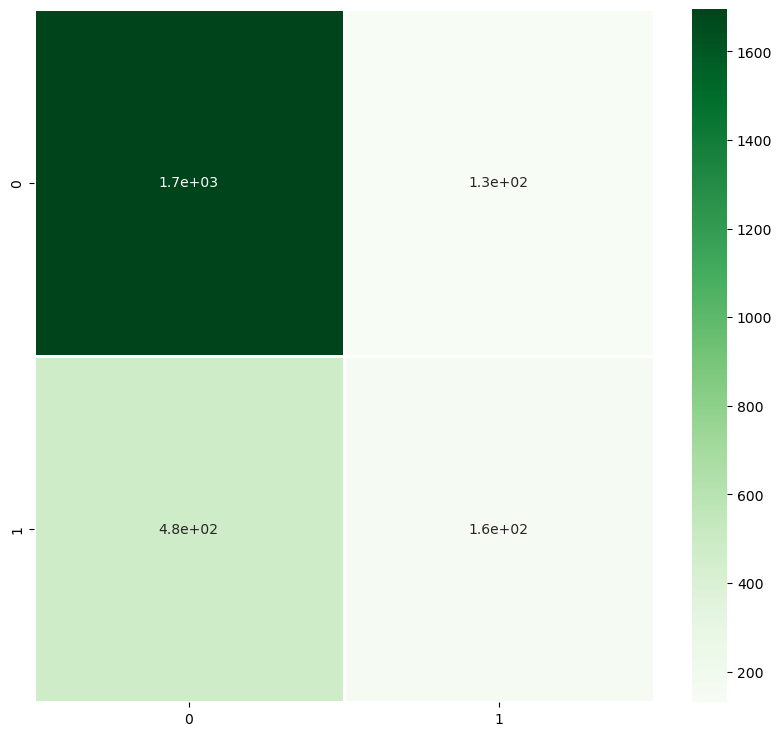

In [69]:
# the confusion matrix
plt.subplots(figsize=(10,9))
sns.heatmap(confusion_matrix(y_test,y_pred),linewidth=2,annot=True,cmap='Greens')
#terrible model with 0 recall on the churn class

#### Random Forest Classifier
* Build a RF classifier where independent variables are 'MonthlyCharges' and 'tenure' and dependent variable is 'Churn'
    - Divide the dataset into train and test sets in a 70:30 ratio
    - Train the model on the train set and predict the values on the test set
    - After predicting the value, find the accuracy score and confusion matrix

In [70]:
# splitting the data
y = data.Churn.replace({'Yes':1,'No':0})

X_train, X_test, y_train, y_test = train_test_split(data[['MonthlyCharges','tenure']],y,test_size=.35,random_state=69)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep=',')

(4577, 2),(4577,),(2466, 2),(2466,)


In [72]:
# creating and training the linear regressor
MRF= RandomForestClassifier(n_estimators=800)

MRF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

In [73]:
# predicting the values
y_pred = MRF.predict(X_test)

#accuracy score
print(f'The accuracy score of the model is: {accuracy_score(y_test,y_pred)}')

The accuracy score of the model is: 0.7489862124898621


<Axes: >

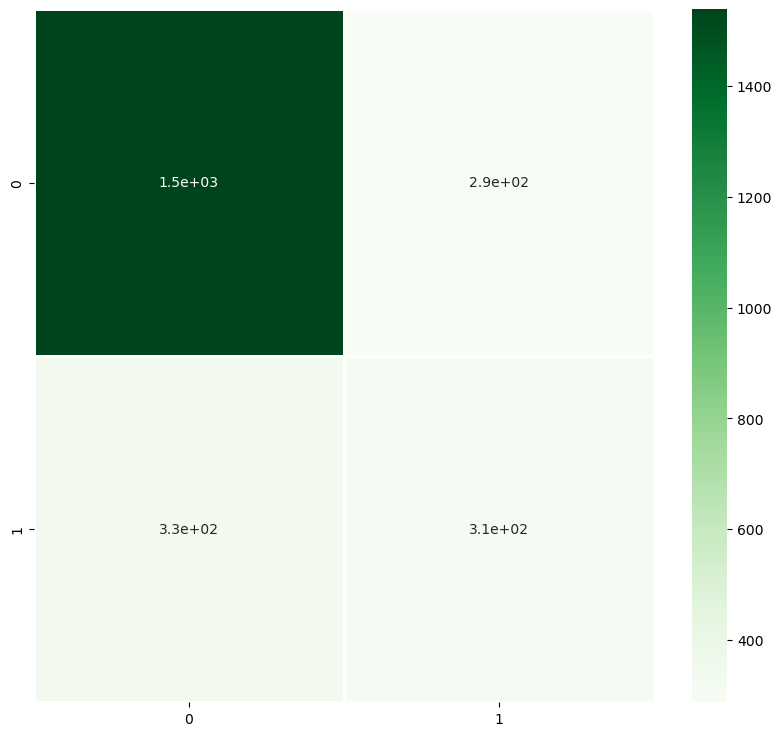

In [74]:
# the confusion matrix
plt.subplots(figsize=(10,9))
sns.heatmap(confusion_matrix(y_test,y_pred),linewidth=2,annot=True,cmap='Greens')
#terrible model with 0 recall on the churn class